# Spam Detection 

1. Read dataset and make it in proper format 
2. Encode labels 
3. Convert all cases to lower 
4. Remove punctuations 
5. Remove stopwords 
6. Check stats of messages 
7. Convert all texts into vectors 
8. Import classifier 
9. Train and test 
10. Check the accuracy/confusion matrix 

In [1]:
# Import libs 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

In [3]:
sms = pd.read_csv('spam.csv',encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# Dataset has extra columns - Remove 
# Renaming v1 and v2  

sms.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

sms.rename(columns={'v1':'label','v2':'message'},inplace=True)

In [5]:
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


ham: is a good message 
    
spam: is a spam message 

In [6]:
print('shape = >',sms.shape)

shape = > (5572, 2)


In [7]:
print('ham and spam counts','\n',sms.label.value_counts())

ham and spam counts 
 ham     4825
spam     747
Name: label, dtype: int64


In [8]:
# Ratio 

print('spam ration = ', round(len(sms[sms['label']=='spam'])/len(sms.label),2)*100,'%')
print('spam ration = ', round(len(sms[sms['label']=='ham'])/len(sms.label),2)*100,'%')

spam ration =  13.0 %
spam ration =  87.0 %


In [9]:
# New column for Length of message 

sms['length'] = sms.message.str.len()
sms.head(5)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [10]:
# Label coding 0 and 1 

sms['label'].replace({'ham':0,'spam':1},inplace=True)

In [11]:
# Convert al messages to lower case 
sms['message'] = sms['message'].str.lower()

In [ ]:
sms.head()

# Regular Expressions 


In [ ]:
 # We want to remove some regular expressions 

In [12]:
# Replace email address with 'email'
sms['message'] = sms['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                            'emailaddress')

#Replace URLs with 'webaddress'
sms['message'] = sms['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$',
                                            'webaddress')

# Replace money symbols with 'moneysymb' (£ can be typed with ALT key + 156)
sms['message'] = sms['message'].str.replace(r'£|\$','dollars')


# Replace 10 digit phone numbers (formats include parenthessis, spaces, no spaces, dashes) with 'phonenumber'
sms['message'] = sms['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                            'phonenumber')


# Replace numbers with 'numbr'
sms['message'] = sms['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [13]:
# Remove punctuation 
sms['message'] = sms['message'].str.replace(r'[^\w\d\s]',' ')

# Replace whitespace between term with a single space 
sms['message'] = sms['message'].str.replace(r'\s+',' ')

# Remove leading and trailing whitespace 
sms['message'] = sms['message'].str.replace(r'^\s+|\s+?$','')

In [14]:
sms.head()

,label,message,length
0,0,go until jurong point crazy available only in ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry in numbr a wkly comp to win fa cup ...,155
3,0,u dun say so early hor u c already then say,49
4,0,nah i don t think he goes to usf he lives arou...,61


In [15]:
sms.head()

,label,message,length
0,0,go until jurong point crazy available only in ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry in numbr a wkly comp to win fa cup ...,155
3,0,u dun say so early hor u c already then say,49
4,0,nah i don t think he goes to usf he lives arou...,61


In [16]:
# Remove stopwords 
import string 
import nltk 
from nltk.corpus import stopwords 

stop_words = set(stopwords.words('english') + ['u','ur','4','2','im','dont','doin','ure'])

sms['message'] = sms['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [17]:
# New column (clean_length) after puinctuations, stopwords removal 
sms['clean_length'] = sms.message.str.len()
sms.head()

,label,message,length,clean_length
0,0,go jurong point crazy available bugis n great ...,111,82
1,0,ok lar joking wif oni,29,21
2,1,free entry numbr wkly comp win fa cup final tk...,155,139
3,0,dun say early hor c already say,49,31
4,0,nah think goes usf lives around though,61,38


In [18]:
sms.head()

,label,message,length,clean_length
0,0,go jurong point crazy available bugis n great ...,111,82
1,0,ok lar joking wif oni,29,21
2,1,free entry numbr wkly comp win fa cup final tk...,155,139
3,0,dun say early hor c already say,49,31
4,0,nah think goes usf lives around though,61,38


In [19]:
# Total length removal 
print('Original Length', sms.length.sum())
print('Clean Length', sms.clean_length.sum())

Original Length 446422
Clean Length 300564


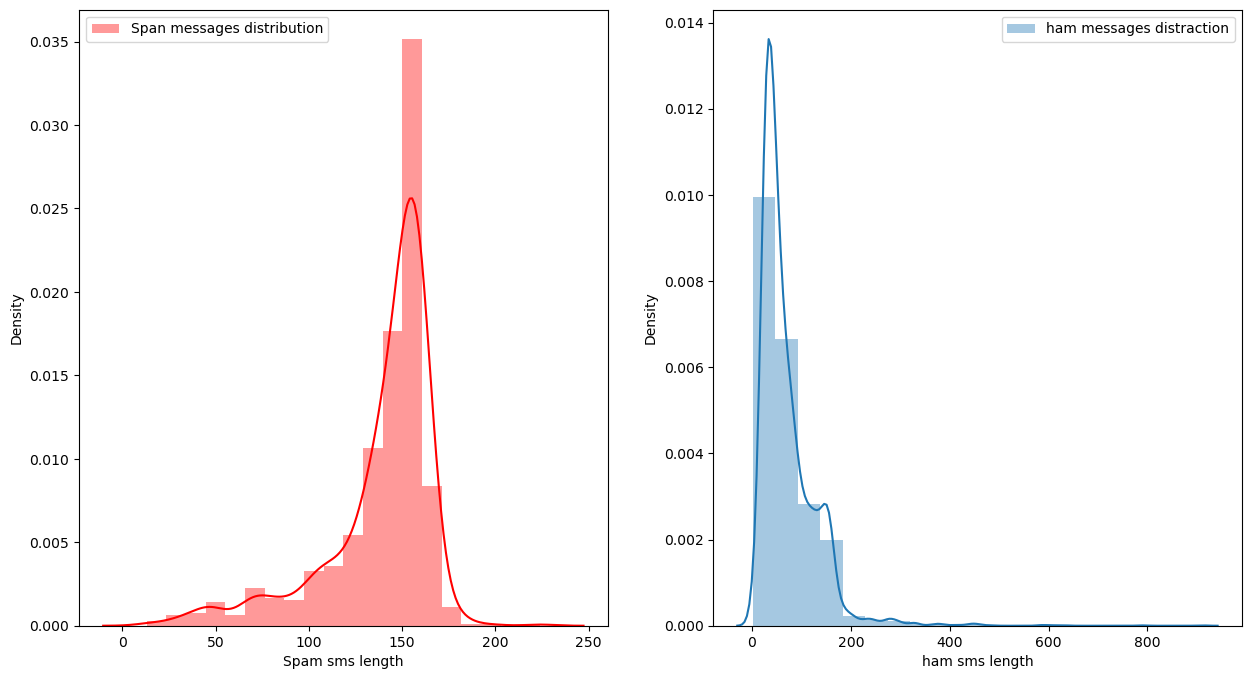

In [20]:
 # Message distribution BRFORE cleaning 
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(sms[sms['label']==1]['length'],bins=20,ax=ax[0], label='Span messages distribution',color='r')

ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(sms[sms['label']==0]['length'],bins=20,ax=ax[1],label='ham messages distraction')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

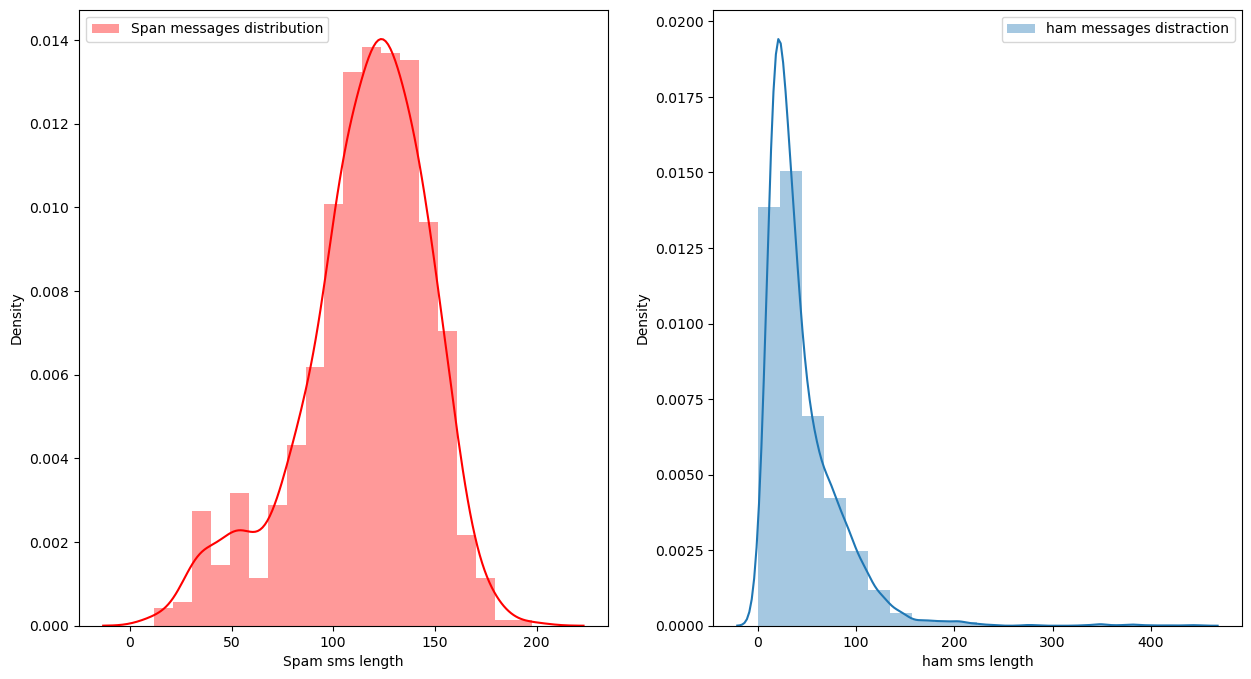

In [21]:
 # Message distribution AFTER cleaning 
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(sms[sms['label']==1]['clean_length'],bins=20,ax=ax[0], label='Span messages distribution',color='r')

ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(sms[sms['label']==0]['clean_length'],bins=20,ax=ax[1],label='ham messages distraction')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

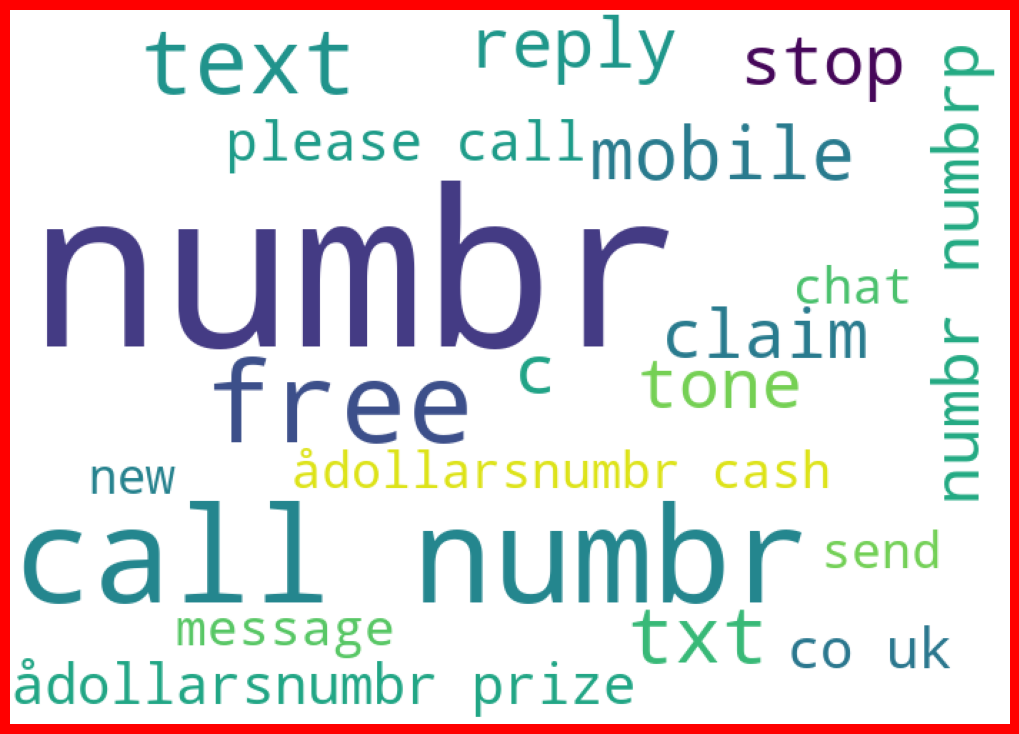

In [23]:
# Getting sense of loud words in spam 
from wordcloud import WordCloud 

spams = sms['message'][sms['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [27]:
# 1. Convert text into vectors using TF-IDF 
# 2. Instantiate MultinomialNB classifier 
# 3. Split feature and label 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features = tf_vec.fit_transform(sms['message'])

x = features
y = sms['label']

In [28]:
# Train and predict 

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

naive.fit(x_train,y_train)

y_pred = naive.predict(x_test)

print('Final score = >', accuracy_score(y_test,y_pred))

Final score = > 0.9705671213208902


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1202
           1       1.00      0.79      0.88       191

    accuracy                           0.97      1393
   macro avg       0.98      0.89      0.93      1393
weighted avg       0.97      0.97      0.97      1393



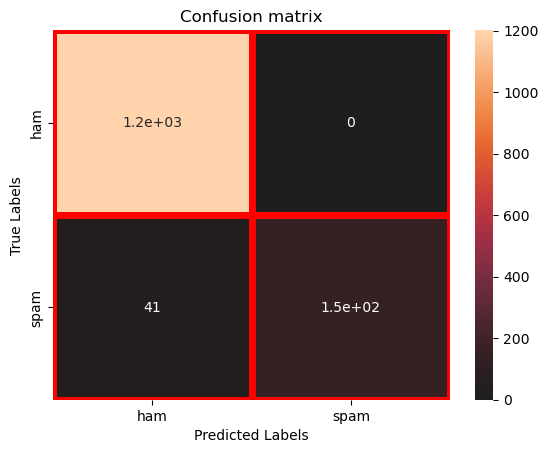

In [30]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()

In [31]:
conf_mat

array([[1202,    0],
       [  41,  150]], dtype=int64)